<a href="https://colab.research.google.com/github/OmdenaAI/omdena-munich-chapter-deepfakes-detection/blob/main/src/tasks/task-4-model-training/Deepfake_Detection_with_EfficientNetB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DeepFake Detection using EfficientNet B0

> Resize the images.

> Trained on a custom dataset.

> Preprocessed images + resized 224x224 and normalized.



Evaluate DeepFake Detection using the following CNN EfficientNet

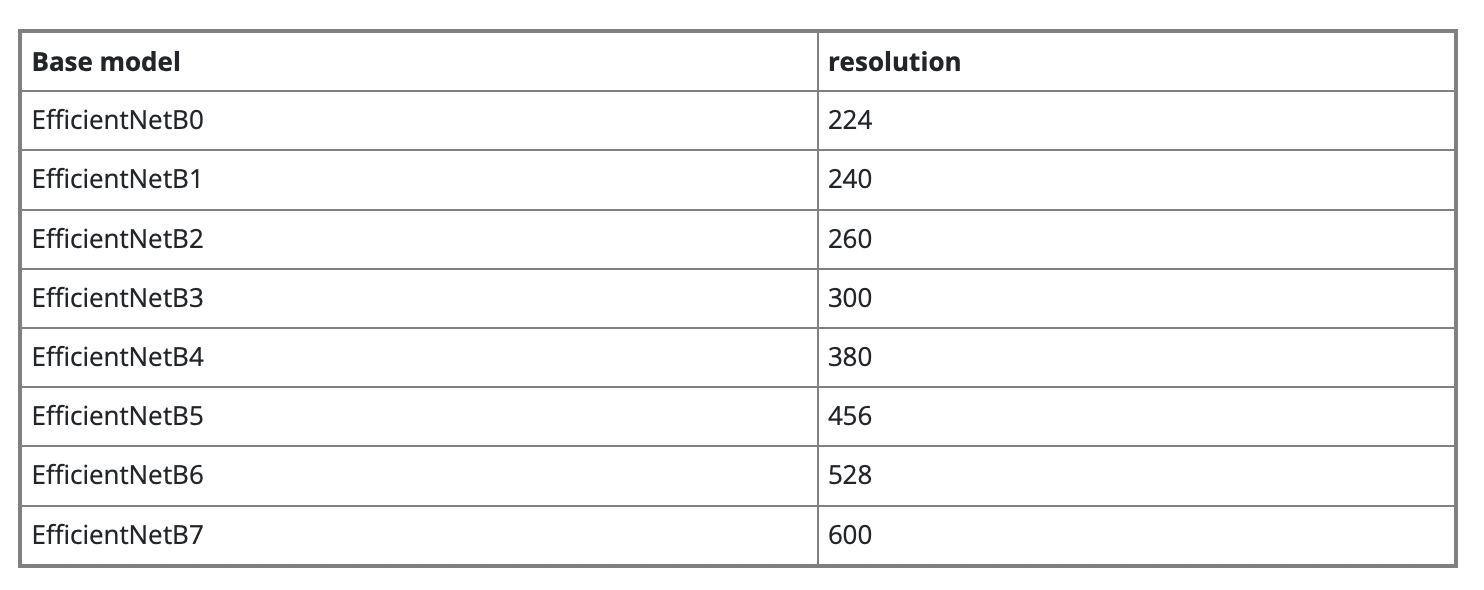

# **Loading training data**

In [ ]:
import zipfile
import os

def extract_zip_files_to_folder(zip_dir, output_dir):
    # Loop through all files in the directory
    for filename in os.listdir(zip_dir):
        # Check if the file is a zip file
        if filename.endswith(".zip"):
            # Construct the full path to the zip file
            zip_file_path = os.path.join(zip_dir, filename)
            
            # Extract the contents of the zip file to the output directory
            with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                zip_ref.extractall(output_dir)

In [ ]:
deepfake_source_dir = "/content/drive/MyDrive/Omdena DeepFake Image Detection (preprocessed data)/Processed_Data/Keras_Data/Train_Data/Deepfake"
real_source_dir="/content/drive/MyDrive/Omdena DeepFake Image Detection (preprocessed data)/Processed_Data/Keras_Data/Train_Data/Real"

deepfake_output_dir = "/content/dataset/deepfake"
real_output_dir="/content/dataset/real"

extract_zip_files_to_folder(deepfake_source_dir, deepfake_output_dir)
extract_zip_files_to_folder(real_source_dir, real_output_dir)

In [ ]:
import shutil
shutil.rmtree('/content/dataset/real/content', ignore_errors=True)
shutil.rmtree('/content/dataset/deepfake/content', ignore_errors=True)

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
import os

!rm -rf `find -type d -name .ipynb_checkpoints`

dataset_path = os.listdir('dataset')

print(dataset_path)
print("Types of classes labels found: ", len(dataset_path))

['deepfake', 'real']
Types of classes labels found:  2


Transfer learning EfficientNetB0

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up the data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        '/content/dataset',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        '/content/dataset',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

# Set up the EfficientNetB0 model with pre-trained weights
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(2, activation='softmax')(x)
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size)

Found 38397 images belonging to 2 classes.
Found 9598 images belonging to 2 classes.
Epoch 1/10
1199/1199 [==============================] - 408s 300ms/step - loss: 0.2655 - accuracy: 0.8940 - val_loss: 0.7789 - val_accuracy: 0.5003
Epoch 2/10
1199/1199 [==============================] - 331s 276ms/step - loss: 0.1541 - accuracy: 0.9417 - val_loss: 1.1016 - val_accuracy: 0.4916
Epoch 3/10
1199/1199 [==============================] - 333s 278ms/step - loss: 0.1154 - accuracy: 0.9572 - val_loss: 3.6788 - val_accuracy: 0.5001
Epoch 4/10
1199/1199 [==============================] - 331s 276ms/step - loss: 0.0946 - accuracy: 0.9640 - val_loss: 4.6879 - val_accuracy: 0.4996
Epoch 5/10
1199/1199 [==============================] - 330s 275ms/step - loss: 0.0787 - accuracy: 0.9716 - val_loss: 2.7242 - val_accuracy: 0.5000
Epoch 6/10
1199/1199 [==============================] - 332s 277ms/step - loss: 0.0616 - accuracy: 0.9779 - val_loss: 2.6516 - val_accuracy: 0.5003
Epoch 7/10
1199/1199 [=====

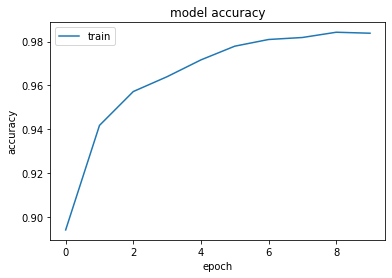

In [ ]:
import matplotlib.pyplot as plt

hist=history

def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_generator)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

300/300 [==============================] - 22s 74ms/step - loss: 178.0557 - accuracy: 0.5000
Validation loss: 178.0557403564453
Validation accuracy: 0.5
